<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/1high_performance_horse_juan_cuevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/horse-after-of-competition-adn/adn_hourse_after_of_competition.fasta
/kaggle/input/adn-hourse-cientificojuancuevasv/adn_hourse.fasta
/kaggle/input/adn-hourse-competition-cientificojuancuevasvasquez/gene.fna
/kaggle/input/get-started-mar-tabular-playground-competition/random_forest.csv
/kaggle/input/get-started-mar-tabular-playground-competition/__results__.html
/kaggle/input/get-started-mar-tabular-playground-competition/__notebook__.ipynb
/kaggle/input/get-started-mar-tabular-playground-competition/__output__.json
/kaggle/input/get-started-mar-tabular-playground-competition/custom.css
/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


quiero comenzar esta investigacion agradeciendo a kaggle por capacitarme en vision computer y por el acceso a su plataforma gracias kaggle

tratare esta investigacion dando una solucion de fondo dido a que mi teoria es que el rendimiento de un caballo en los ultimos metros de competencia no tiene relacion con variables externas si no de tipo fisiologicas de tipo endogenas osea a nivel celular...... manos a la obra¡¡¡¡¡

In [ ]:
!sudo pip install Bio

     |████████████████████████████████| 270 kB 281 kB/s 
     |████████████████████████████████| 78 kB 2.2 MB/s 
     |████████████████████████████████| 2.3 MB 3.3 MB/s 
     |████████████████████████████████| 17.1 MB 752 kB/s 


In [ ]:
from Bio.Seq import Seq
from Bio import SeqIO

In [ ]:
adn_hourse = SeqIO.read("../input/adn-hourse-cientificojuancuevasv/adn_hourse.fasta","fasta")

**CABALLO EN ESTADO DE REPOSO**

In [ ]:
adn_hourse

SeqRecord(seq=Seq('CCCCACCCCAGGAAAGTAGTGAGACCCATGGCGAGCGCTGGGCAGGAAGGCCCT...TCA'), id='NC_009147.3:102768699-102775917', name='NC_009147.3:102768699-102775917', description='NC_009147.3:102768699-102775917 ASIC3 [organism=Equus caballus] [GeneID=100063408] [chromosome=4]', dbxrefs=[])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 184.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for bcbio-gff: filename=bcbio_gff-0.6.9-py3-none-any.whl size=15954 sha256=36292b15b015773bbf519c2fe0a7cde4e791df6963643c387d38800171888c28
  Stored in directory: /root/.cache/pip/wheels/fb/fc/e0/2e7658046d32b794fdfd1e0ec266dc8bae21c1811b18951b6d
Successfully built bcbio-gff


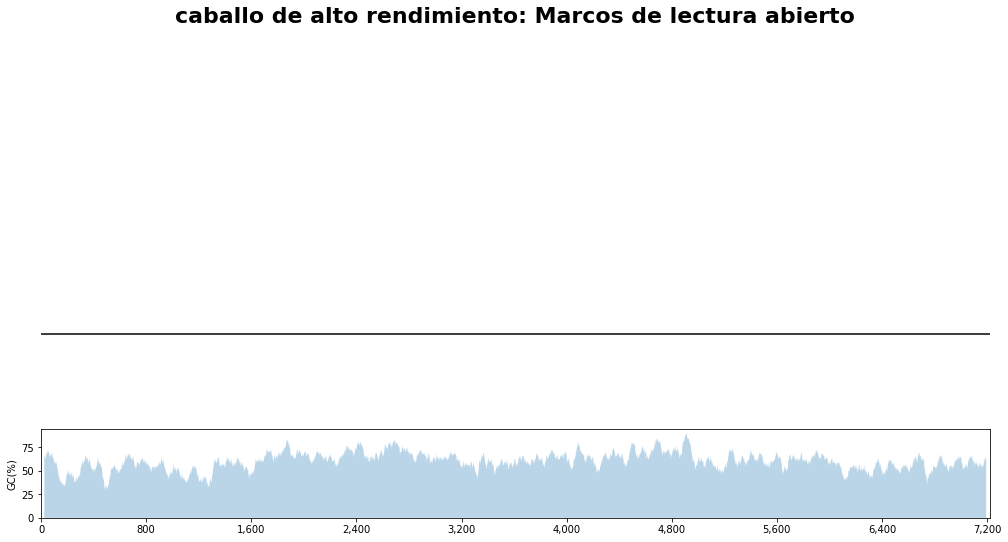

In [ ]:
#Install DNA_features_viewer for visuazation and bcbio-gff for parsing
!pip install bcbio-gff
!pip install dna_features_viewer

#Import libraries
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(17, 9), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
ax1.set_title('caballo de alto rendimiento: Marcos de lectura abierto', size=22, weight='bold')

# PLOT THE RECORD MAP
record = SeqIO.read("../input/adn-hourse-cientificojuancuevasv/adn_hourse.fasta", "fasta")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# TRAZAR EL CONTENIDO DE GC LOCAL (utilizamos ventanas de 50 pb)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")
plt.show()

**kaggle moment please I go take a coofe**

La transcripción es el primer paso en la expresión genética. Implica copiar la secuencia de ADN de un gen para hacer una molécula de ARN.

Básicamente, el ARNm es una copia de nuestro ADN. Sin embargo, en el ARN, una base llamada uracilo (U) reemplaza a la timina (T) como nucleótido complementario de la adenina (esa es la única diferencia, T se reemplaza por U). Podemos transcribir nuestra secuencia de ADN con Biopython de transcribir () la función ahora vamos a trancribir el adn del caballo  arn ....fantastic

In [ ]:
arn_h= adn_hourse.seq

In [ ]:
arnm_hourse = arn_h.transcribe()

In [ ]:
arnm_hourse

Seq('CCCCACCCCAGGAAAGUAGUGAGACCCAUGGCGAGCGCUGGGCAGGAAGGCCCU...UCA')

In [ ]:
import pandas as pd

DNA= arnm_hourse
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

{'C': 2266, 'A': 1454, 'G': 2081, 'U': 1418}


In [ ]:
import pandas as pd

DNA= arnm_hourse
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

{'C': 2266, 'A': 1454, 'G': 2081, 'U': 1418}


In [ ]:
#crando un dataframe molecular
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)
nts

,nucleotides,frequency
3,U,1418
1,A,1454
2,G,2081
0,C,2266


In [ ]:
#Traducir la secuencia de ARNm a una cadena de aminoácidos
hourse_aminoacidos_cadena = arnm_hourse.translate()


/opt/conda/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
hourse_aminoacidos_cadena 

Seq('PHPRKVVRPMASAGQEGPAVGCTLAMEP*PQPWLPQLVKVDRKSGCASS*KVVL...PCL')

terminamos la primera parte del analisis de adn del caballo para la toma de desiciones

> **CABALLO DESPUES DE UNA COMPETICION**

In [ ]:
adn_hourse_COMPT = SeqIO.read("../input/horse-after-of-competition-adn/adn_hourse_after_of_competition.fasta","fasta")

In [ ]:
adn_hourse_COMPT

SeqRecord(seq=Seq('CCCCACCCCAGGAAAGTAGTGAGACCCATGGCGAGCGCTGGGCAGGAAGGCCCT...ATA'), id='NC_009147.3:102768699-102775917', name='NC_009147.3:102768699-102775917', description='NC_009147.3:102768699-102775917 ASIC3 [organism=Equus caballus] [GeneID=100063408] [chromosome=4]', dbxrefs=[])

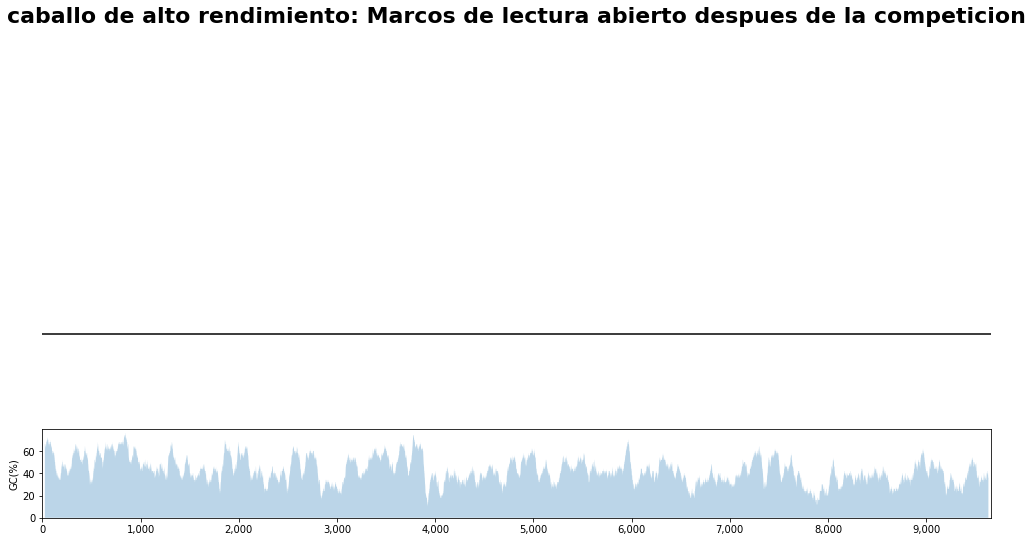

In [ ]:
#Install DNA_features_viewer for visuazation and bcbio-gff for parsing
!pip install bcbio-gff
!pip install dna_features_viewer

#Import libraries
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(17, 9), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
ax1.set_title('caballo de alto rendimiento: Marcos de lectura abierto despues de la competicion', size=22, weight='bold')

# PLOT THE RECORD MAP
record = SeqIO.read("../input/horse-after-of-competition-adn/adn_hourse_after_of_competition.fasta", "fasta")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# TRAZAR EL CONTENIDO DE GC LOCAL (utilizamos ventanas de 50 pb)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")
plt.show()

In [ ]:
arn_C= adn_hourse_COMPT.seq
arnm_hourse_COMPT = arn_C.transcribe()
arnm_hourse_COMPT


Seq('CCCCACCCCAGGAAAGUAGUGAGACCCAUGGCGAGCGCUGGGCAGGAAGGCCCU...AUA')

In [ ]:
import pandas as pd

DNA= arnm_hourse_COMPT
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)

{'C': 1942, 'A': 2819, 'G': 2160, 'U': 2739}


In [ ]:
#crando un dataframe molecular
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)
nts

,nucleotides,frequency
0,C,1942
2,G,2160
3,U,2739
1,A,2819


RESUMEN

El lactato se considera un metabolito de desecho que se produce durante la fatiga muscular. En contraste con esta visión simplista, en este trabajo se proporcionan evidencias de las múltiples y complejas funciones de este metabolito. Se muestra que: 1) el lactato es el producto final de la glucólisis, independientemente de la concentración de oxígeno en el medio en el que se encuentren las células; 2) el lactato forma parte de 2 tipos de lanzadera, una que funciona en el espacio intermembranal de la mitocondria, y otra intercelular, que se encarga de alimentar con lactato a ciertos tipos celulares, como las neuronas o el músculo cardiaco; 3) en los espermatozoides, el lactato se transporta directamente a la matriz mitocondrial y allí se oxida para producir piruvato y NADH; 4) en el hígado, el lactato participa en la oxidación del etanol a través de la generación de peróxido de hidrógeno; 5) que dependiendo de la estirpe celular, el lactato puede funcionar como agente antiinflamatorio (endocrino) o regulador de la expresión génica.

Palabras clave: Fermentación láctica; hipoxia; fatiga muscular; regulador génico



GAU = ASP
GAC = ASP

EN el siguente analisis podemos ver como los niveles de urasilo,adenina y guanina son mayores en el caballo depues de la competicion.esto conlleva a una mayor cantidad de aspartato en la musculatura del caballo lo que  conlleva en una fatiga muscular y por lo mismo a una poca contraccion muscular y bajo rendimiento en los ultimos metros de la competicion del caballo.

El ácido aspártico o su forma ionizada, el aspartato (símbolos Asp y D) es uno de los veinte aminoácidos con los que las células forman las proteínas. En el ARN se encuentra codificado por los codones GAU o GAC. Presenta un grupo carboxilo (-COOH) en el extremo de la cadena lateral. Su fórmula química es HO
2CCH(NH
2)CH
2CO
2H.

A pH fisiológico, tiene una carga negativa (es ácido); pertenece al grupo de aminoácidos con cadenas laterales polares cargadas. No es un aminoácido esencial ya que puede ser sintetizado por el organismo humano. Su biosíntesis tiene lugar por transaminación del ácido oxalacético, un metabolito intermediario del ciclo de Krebs.
https://es.wikipedia.org/wiki/%C3%81cido_asp%C3%A1rtico


SOLUCION

Es cierto que la fatiga y el agotamiento durante, o después del ejercicio, pueden producirse por múltiples factores, pero uno de los más populares es el famoso ácido láctico.

Por eso, hoy queremos contarte qué es, cómo funciona y cómo puedes reducirlo para mejorar tu rendimiento deportivo y no sentirte tan fatigado en cada entrenamiento.

Qué es el ácido láctico
También conocido como lactato (erróneamente) o hidroxipropanoico, el ácido láctico es una molécula que surge a partir de la utilización de la glucosa como energía cuando no hay oxígeno, es decir, en ejercicios de alta intensidad y duración media.

Lo que sucede es que el organismo utiliza glucosa como combustible y la degrada hasta ácido láctico, compuesto que de no ser usado o eliminado, puede producir fatiga e influir negativamente en el rendimiento

Hay que decir que el ácido láctico se produce de forma natural en los músculos durante los esfuerzos y a través del piruvato catalizado por la enzima “lactato” deshidrogenasa (fermentación del ácido láctico)

Por tanto, podemos decir que el ácido láctico, cuya fórmula química es C3H6O3, tiene un papel fundamental en el metabolismo anaeróbico y que si piensas realizar pesas con grandes cargas o carreras a gran velocidad puedes verte afectado negativamente.

Y es que, cuando se genera mucho ácido láctico, las enzimas anaeróbicas se ven influenciadas negativamente dado que dejan de producir energía para proveer a los músculos. Además, el exceso de ácido láctico afecta al calcio presente en los músculos, por lo que la capacidad de contracción de estos también se ve limitada.

Para que se entienda mejor diremos que cuando hay exceso de ácido láctico en el cuerpo no existe energía ni capacidad de contracción muscular, por lo que termina apareciendo lo que llamamos fatiga.

Por todo esto, resulta necesario conocer cuál es tu umbral de ácido láctico y entrenar para reducirlo o controlarlo.

Ademas es aconsejable que el entrenamiento del caballo de alto rendimiento, se acostumbre al lactato atrvez de ejercicios anaerobicos osea carreras cortas en tiempo pero en alta velocidad para que la musculatura se acostumbre al lactato..y asi evitar lesiones y mejorar la velocidad en las carreras..
Analisis creado por juan cuevas vasquez chile 2022